In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
url = "https://www.lottecinema.co.kr/NLCHS/Movie/MovieDetailView?movie=19438"
import chromedriver_autoinstaller
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
chromedriver_autoinstaller.install()

# 크롬 드라이버를 불러옵니다. ChromeDriverManager가 자동으로 최신 드라이버를 다운로드하여 사용합니다.
driver = webdriver.Chrome()

# 롯데시네마 웹사이트의 영화 페이지로 이동합니다.
driver.get(url)

# 평점 메뉴를 클릭하여 평점 페이지로 이동합니다.
driver.find_element(By.XPATH, '//*[@id="contents"]/ul/li[2]/button/span') \
    .click()

# 리뷰 추가 로드
num_reviews = 100 # 더 보고싶은 페이지 로드
wait = WebDriverWait(driver, 10)
#element = driver.find_element(By.XPATH, '//*[@class="review_info"]')

while len(driver.find_elements(By.XPATH, '//*[@class="review_info"]')) < num_reviews:
    try:
        wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="btn_review_more"]/span'))) \
            .click()
    except:
        break
        
#리뷰 데이터 수집
reviews = driver.find_elements(By.XPATH, '//*[@class="review_info"]')
comment = []

for review in reviews[:num_reviews]:
    review_text = review.text
    comment.append(review_text)
    
print(comment)

# 드라이버를 종료합니다.
driver.quit()


['역시는 역시! You inspire me :)', '한국계 감독이라 한국정서에 잘 맞아요.앰버와 웨이드 원소이야기 감동적이예요.', '즐거운 상상력', '좋네요', '재미있게 잘 봤어요 !!', '디즈니의 역대작이네요!!', '초심으로 돌아온 픽사. 신박한 발상. 아쉬운 서사.', '역시 믿고보는 픽사', '디즈니 픽사는 어른들의 애니메이션', '공감과 소통이 무엇인지 그리고 왜 필요한지를 알려주네요', '애들영화라 생각하고 보다 눈물이...', '힐링 힐링 힐링', '이프 프시케 푸른수염의 아내', '저는 별로얐어요 픽사치고 캐릭터가 매력적으로 다가오지 않았고 꿈과 사랑, 이민자의 삶 여러가지를 이야기하려다보니 내용이 개연성이 없고 몰입이 되지 않았어요', '믿고보는 픽사', '재미있게 잘봤습니다', '정말 재미있게 잘봤습니다', '재미있게 잘봤습니다', '귀엽고 감동적이고 눈물나요', '재미있게 잘봤습니다', '요즘 영화답지않게 고퀄의 영상미는 아니었지만 스토리는 너무좋았어요 울컥함 ㅠㅠ', '신선하고 독특한 소재를 이렇게 구현하다니~ 울다가 웃다가 재밌게 봤습니다!!', '독특한 소재. 한국감독이라 그런가 어째 K정서가 한가득이라 캐릭터에 감정이입 완전함', '영상미는 좋았는데~ 제 취향이 아니네요..', '스토리는 아쉽지만 캐릭터들이 귀엽네요', '신선한 소재. 몽글몽글 귀여운 영화', '재밌게봤어요 ㅋㅋㅋ ㅎㅎ', '재밌었어요 추천합니다 ㅎㅎ', '진짜 재밌어요 꽉찬 극장이였는데 관크도 없고 너무 좋았어요', '너무 좋아요!', '색감이 너무 예뻐요!', '원소를 사용한 좋은 아이디어 따봉', '색감도 좋고 잼있습니다', '그렇게 재미있진않네요', '초딩 4학년 딸아이가 연신 아름답고 재밌다고 감탄하며 본 영화~ 사랑하는 딸아~ 네가 좋아하고 행복할 수 있는 일을 하며 살아가거라♡♡♡', '한국계 감독다운 장면들이 보였네요 재밌게 봤습니다', '스토리는 별거없지만 감동도 재미도 있음', '정석적인 이야기', '마음 따뜻해지는 힐링 영화', "영상미

In [22]:
!pip install chromedriver_autoinstaller
!pip install chromedriver_autoinstaller
!pip install konlpy wordcloud

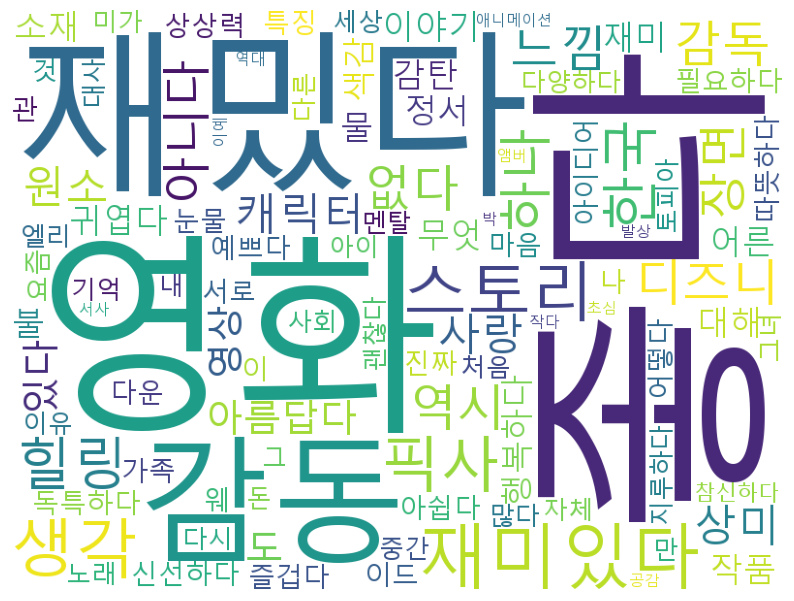

In [35]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 형태소 분석기 생성
okt = Okt()

# 형태소 분석 후 명사와 형용사만 추출하여 리스트로 저장
# 형태소 분석 후 명사와 형용사만 추출하여 리스트로 저장
words = []
for sentence in comment:
    pos = okt.pos(sentence, norm=True, stem=True)
    words.extend([word for word, tag in pos if tag in ['Noun', 'Adjective'] and word is not None])

# 추출한 단어로부터 단어 빈도수 계산
count = Counter(words)
tags = count.most_common(100)

# 'None' 제거
tags = [(word, freq) for word, freq in tags if word is not None]

# 워드클라우드 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      width=800, 
                      height=600).generate_from_frequencies(dict(tags))

# 워드클라우드 이미지 출력
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

data = {'review': tags}
dataframe = pd.DataFrame(data)
dataframe.to_csv('review.csv', index=False, encoding='utf-8-sig')